In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing

import wrangle
from wrangle import get_kickstarter_data
from wrangle import missing_zero_values_table
from wrangle import handle_missing_values
import explore

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = get_kickstarter_data()

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.currency.value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [6]:
mz_table = missing_zero_values_table(df)
mz_table

Your selected dataframe has 15 columns and 378661 Rows.
There are 2 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
usd pledged,68112,3797,1.0,71909,19.0,float64
name,0,4,0.0,4,0.0,object
ID,0,0,0.0,0,0.0,int64
category,0,0,0.0,0,0.0,object
main_category,0,0,0.0,0,0.0,object
currency,0,0,0.0,0,0.0,object
deadline,0,0,0.0,0,0.0,object
goal,0,0,0.0,0,0.0,float64
launched,0,0,0.0,0,0.0,object
pledged,52527,0,0.0,52527,13.9,float64


In [7]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
df['usd pledged'].isnull().sum()

3797

In [9]:
df.shape

(378661, 15)

# Takeaways

?

In [10]:
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = 1)

In [11]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [12]:
df.shape

(374860, 15)

# Takeaways

- Total number of null values removed = 3801.
- Total of 4 instances from name column and 3797 instances from usd_pledged column
- I removed the rows with null values to keep the data frame values equal.

In [13]:
df = df.drop(columns = ['pledged', 'usd pledged', 'goal', 'ID', 'name', 'category'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   main_category     374860 non-null  object 
 1   currency          374860 non-null  object 
 2   deadline          374860 non-null  object 
 3   launched          374860 non-null  object 
 4   state             374860 non-null  object 
 5   backers           374860 non-null  int64  
 6   country           374860 non-null  object 
 7   usd_pledged_real  374860 non-null  float64
 8   usd_goal_real     374860 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 28.6+ MB


In [15]:
df.drop(df.index[df['state'] == 'canceled'], inplace = True)
df.drop(df.index[df['state'] == 'live'], inplace = True)
df.drop(df.index[df['state'] == 'suspended'], inplace = True)
df.drop(df.index[df['backers'] == 0], inplace = True)

<AxesSubplot:>

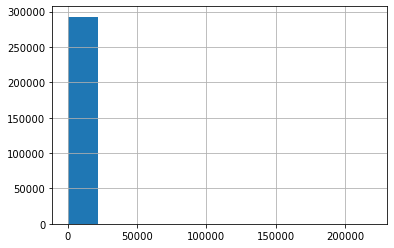

In [16]:
df.backers.hist()

In [17]:
df.state.value_counts()

failed        158974
successful    133851
Name: state, dtype: int64

# Takeaways

- I only wanted to look at projects that succeded or failed, so I decided to drop the indivudal sub-categorys within state leaving success and failed.

In [18]:
def set_cat_to_num(df):
    if (df['main_category'] == 'Film & Video'):
        return 1
    elif (df['main_category'] == 'Music'):
        return 2
    elif (df['main_category'] == 'Publishing'):
        return 3
    elif (df['main_category'] == 'Games'):
        return 4
    elif (df['main_category'] == 'Technology'):
        return 5
    elif (df['main_category'] == 'Art'):
        return 6
    elif (df['main_category'] == 'Design'):
        return 7
    elif (df['main_category'] == 'Food'):
        return 8
    elif (df['main_category'] == 'Fashion'):
        return 9
    elif (df['main_category'] == 'Theater'):
        return 10
    elif (df['main_category'] == 'Comics'):
        return 11
    elif (df['main_category'] == 'Photography'):
        return 12
    elif (df['main_category'] == 'Crafts'):
        return 13
    elif (df['main_category'] == 'Journalism'):
        return 14
    elif (df['main_category'] == 'Dance'):
        return 15

In [19]:
def set_curr_to_num(df):
    if (df['currency'] == 'USD'):
        return 1
    elif (df['currency'] == 'GBP'):
        return 2
    elif (df['currency'] == 'EUR'):
        return 3
    elif (df['currency'] == 'CAD'):
        return 4
    elif (df['currency'] == 'AUD'):
        return 5
    elif (df['currency'] == 'SEK'):
        return 6
    elif (df['currency'] == 'MXN'):
        return 7
    elif (df['currency'] == 'NZD'):
        return 8
    elif (df['currency'] == 'DKK'):
        return 9
    elif (df['currency'] == 'CHF'):
        return 10
    elif (df['currency'] == 'NOK'):
        return 11
    elif (df['currency'] == 'HKD'):
        return 12
    elif (df['currency'] == 'SGD'):
        return 13
    elif (df['currency'] == 'JPY'):
        return 14

In [20]:
def set_country_to_num(df):
    if (df['country'] == 'US'):
        return 1
    elif (df['country'] == 'GB'):
        return 2
    elif (df['country'] == 'CA'):
        return 3
    elif (df['country'] == 'AU'):
        return 4
    elif (df['country'] == 'DE'):
        return 5
    elif (df['country'] == 'FR'):
        return 6
    elif (df['country'] == 'NL'):
        return 7
    elif (df['country'] == 'IT'):
        return 8
    elif (df['country'] == 'ES'):
        return 9
    elif (df['country'] == 'SE'):
        return 10
    elif (df['country'] == 'MX'):
        return 11
    elif (df['country'] == 'NZ'):
        return 12
    elif (df['country'] == 'DK'):
        return 13
    elif (df['country'] == 'IE'):
        return 14
    elif (df['country'] == 'CH'):
        return 15
    elif (df['country'] == 'NO'):
        return 16
    elif (df['country'] == 'BE'):
        return 17
    elif (df['country'] == 'AT'):
        return 18
    elif (df['country'] == 'HK'):
        return 19
    elif (df['country'] == 'SG'):
        return 20
    elif (df['country'] == 'LU'):
        return 21
    elif (df['country'] == 'JP'):
        return 22

In [21]:
df['main_category_val'] = df.apply(set_cat_to_num, axis = 1)
df = df.drop(columns = ['main_category'])

df['currency_type_val'] = df.apply(set_curr_to_num, axis = 1)
df = df.drop(columns = ['currency'])

df['country_name_val'] = df.apply(set_country_to_num, axis = 1)
df = df.drop(columns = ['country'])

In [22]:
df.head()

,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,main_category_val,currency_type_val,country_name_val
1,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.0,1,1,1
2,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.0,1,1,1
3,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.0,2,1,1
5,2016-04-01,2016-02-26 13:38:27,successful,224,52375.0,50000.0,8,1,1
6,2014-12-21,2014-12-01 18:30:44,successful,16,1205.0,1000.0,8,1,1


In [23]:
from wrangle import get_dummies

In [24]:
df = get_dummies(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292825 entries, 1 to 378660
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   deadline           292825 non-null  object 
 1   launched           292825 non-null  object 
 2   backers            292825 non-null  int64  
 3   usd_pledged_real   292825 non-null  float64
 4   usd_goal_real      292825 non-null  float64
 5   main_category_val  292825 non-null  int64  
 6   currency_type_val  292825 non-null  int64  
 7   country_name_val   292825 non-null  int64  
 8   state_failed       292825 non-null  int64  
 9   state_successful   292825 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 24.6+ MB


In [26]:
from wrangle import turn_to_time

In [27]:
df = turn_to_time(df)

In [28]:
df.head()

,backers,usd_pledged_real,usd_goal_real,main_category_val,currency_type_val,country_name_val,state_failed,state_successful,number_of_days
1,15,2421.0,30000.0,1,1,1,1,0,44
2,3,220.0,45000.0,1,1,1,1,0,29
3,1,1.0,5000.0,2,1,1,1,0,34
5,224,52375.0,50000.0,8,1,1,0,1,44
6,16,1205.0,1000.0,8,1,1,0,1,29


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226596 entries, 1 to 292823
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   backers            226596 non-null  int64  
 1   usd_pledged_real   226596 non-null  float64
 2   usd_goal_real      226596 non-null  float64
 3   main_category_val  226596 non-null  int64  
 4   currency_type_val  226596 non-null  int64  
 5   country_name_val   226596 non-null  int64  
 6   state_failed       226596 non-null  int64  
 7   state_successful   226596 non-null  int64  
 8   number_of_days     226596 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 17.3 MB


In [30]:
from wrangle import handle_outliers_backers
from wrangle import handle_outliers_usd_pledged_real
from wrangle import handle_outliers_usd_goal_real

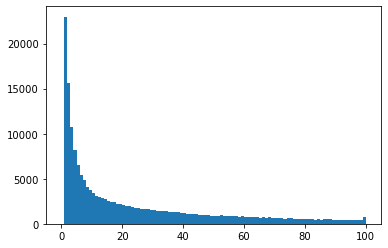

In [31]:
df = handle_outliers_backers(df)

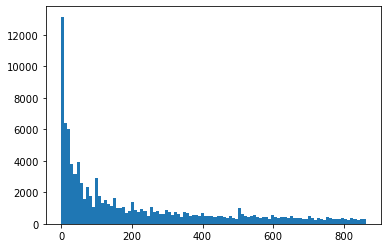

In [32]:
df = handle_outliers_usd_pledged_real(df)

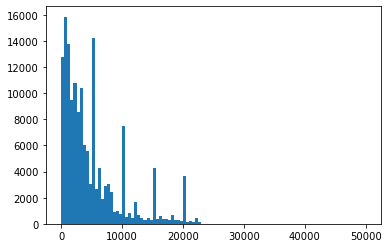

In [33]:
df = handle_outliers_usd_goal_real(df)

In [34]:
from wrangle import data_split

In [35]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = data_split(df, stratify_by='state')

In [36]:
train.head()

,backers,usd_pledged_real,usd_goal_real,main_category_val,currency_type_val,country_name_val,state_failed,state_successful,number_of_days
214806,10,343.0,10000.0,7,1,1,1,0,29
69476,2,6.0,8000.0,1,1,1,1,0,29
15972,1,15.0,300.0,1,1,1,1,0,30
192608,76,4726.0,2700.0,3,1,1,0,1,29
225777,1,1.0,10000.0,5,1,1,1,0,59


In [37]:
X_train.head()

,backers,usd_pledged_real,usd_goal_real,main_category_val,currency_type_val,country_name_val,state_failed,number_of_days
214806,10,343.0,10000.0,7,1,1,1,29
69476,2,6.0,8000.0,1,1,1,1,29
15972,1,15.0,300.0,1,1,1,1,30
192608,76,4726.0,2700.0,3,1,1,0,29
225777,1,1.0,10000.0,5,1,1,1,59


In [38]:
y_train.head()

,state_successful
214806,0
69476,0
15972,0
192608,1
225777,0


# Takeaways

- I split the data up into train, X_train, y_train in order to have a least biased evalutaion of my models performance. 
- This process generated three new datframes for each (train, validate, test)

# Explore

<AxesSubplot:xlabel='backers'>

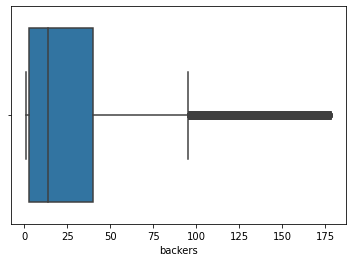

In [39]:
sns.boxplot(x="backers", data=train)

<AxesSubplot:xlabel='usd_pledged_real'>

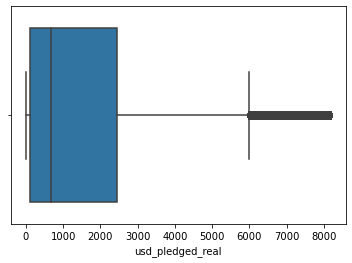

In [40]:
sns.boxplot(x="usd_pledged_real", data=train)

<AxesSubplot:xlabel='usd_goal_real'>

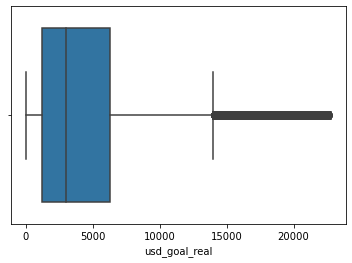

In [41]:
sns.boxplot(x="usd_goal_real", data=train)

In [42]:
corr = train.corr()

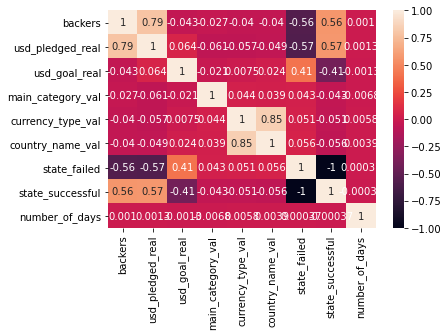

In [43]:

sns.heatmap(corr, annot=True)
plt.show()

In [44]:
corr = pd.DataFrame(corr)
corr_state_successful = pd.DataFrame(corr.state_successful)
corr_state_successful

,state_successful
backers,0.562896
usd_pledged_real,0.572991
usd_goal_real,-0.413447
main_category_val,-0.042572
currency_type_val,-0.051343
country_name_val,-0.056363
state_failed,-1.000000
state_successful,1.000000
number_of_days,-0.000373


# Findings
--------------------------------------------------------
- I found that the highest contriubter to the success of a project is the number of backers and pledged usd.
- I want to know how to predict how many backers or the amount of pledged money you will get
- What feature influences the backers or the ammount spent twords a project?
--------------------------------------------------------
- I also found that the there is a slight negative correlation tied to usd_goal_real and state_success. This means that as the goal of projects increase there is a negative impact twords the overall success of the project. 
- From this we could look at where the 'sweet spot' for goal ammounts to increase the liklyhood of getting funded and being successful.
--------------------------------------------------------


<AxesSubplot:>

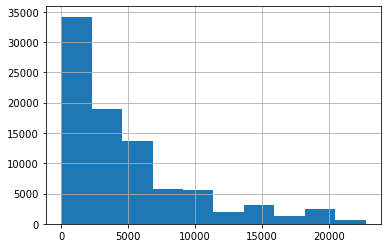

In [45]:
train.usd_goal_real.hist()

In [46]:
train.usd_goal_real.describe()

count    87505.000000
mean      4855.202354
std       4936.140067
min          0.490000
25%       1200.000000
50%       3000.000000
75%       6311.780000
max      22736.570000
Name: usd_goal_real, dtype: float64

# Findings

-

<AxesSubplot:>

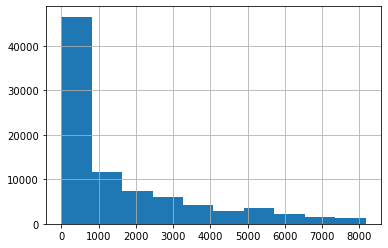

In [47]:
train.usd_pledged_real.hist()

In [48]:
train.usd_pledged_real.describe()

count    87505.000000
mean      1585.617716
std       1975.078774
min          0.480000
25%        101.000000
50%        676.530000
75%       2459.000000
max       8172.000000
Name: usd_pledged_real, dtype: float64

# Findings

- 

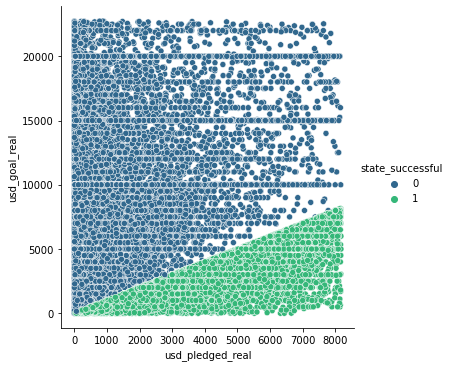

In [49]:
sns.relplot(x = 'usd_pledged_real', y= 'usd_goal_real', data = train, hue = train.state_successful, palette='viridis')

# Findings

- I discovered that goal amount has a negative impact on the success of the project. I found that the majority of succeful projects lied between 10 and roughly 8000 dollar range. 
- I have determined to better ones chances at having a successful project they would need to set their project goal at around 5000 dollars.
- This feature does not determin you success on its own, I need to look at the main category as well as tyhe number of backers to see if these features can be accurate identifiers for project success. 

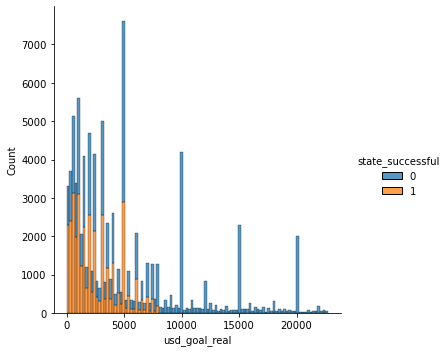

In [50]:
sns.displot(train, x="usd_goal_real", hue= train.state_successful, multiple="stack")

# Findings

- Form this graph we can see that there is a sharp cut off at around 8000 dollars when projects go from having the posibility of being successful to not.
- I also saw a significant spike in projects that are success full in the 5000 dollar range.
- The majority of projects that are successful percentage wise are those between 1000 and 3000 dollar range. 

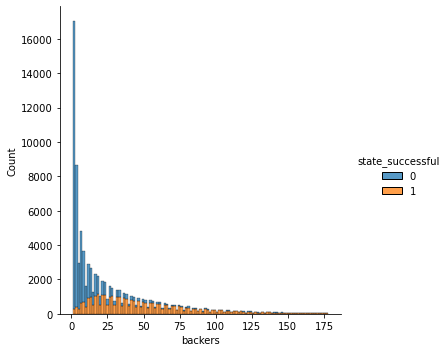

In [51]:
sns.displot(train, x="backers", hue= train.state_successful, multiple="stack")

# Findings

- The majority of projects that hade 25 > greater backers where more successful.

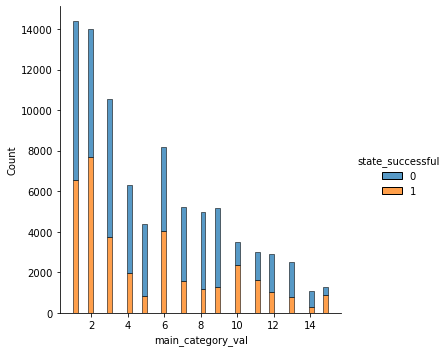

In [52]:
sns.displot(train, x="main_category_val", hue= train.state_successful, multiple="stack")

# Findings

- Cat 1 - (film_video) is the most popular propject on the kickstarter website, Their success/fail ratio is average.
- Cat 2 - (Music) is the most successful and secound most popular catagory.
- Cat 5 - (Technology) is the least has the worst success to fail ratio.
- Cat 14 and Cat 15 - (Journalism and Dance) are the least popular categorys with Journalism having terible success/fail ratio. Dance has a good success/fail ratio but not as popular.

(0.0, 40000.0)

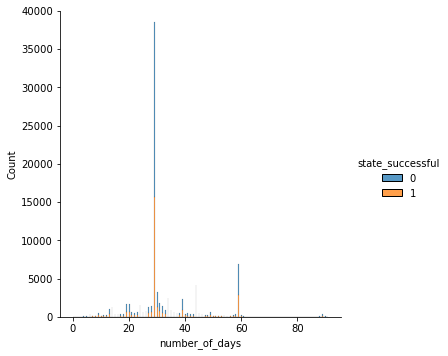

In [53]:
sns.displot(train, x="number_of_days", hue= train.state_successful, multiple="stack")
plt.ylim(0, 40000)

# Findings

- The majority of projects that were successful took 30 days to have their goal filled.

# Stat Tests

In [54]:
from stat_tests import t_test
from stat_tests import chi2

### Test 1

- HO: There is no relationship between usd_pledged_real and state_successful
- HA: There is a relationship between usd_pledged_real and state_successful

In [60]:
population_1 = train.usd_pledged_real 	
population_2 = train.state_successful
alpha = .05

In [61]:
t_test( population_1, population_2, alpha, sample=1, tail=2, tail_dir="higher")

t-stat = 237.4207
p     = 0.0

Because the p-value: 0.0 is less than the alpha: 0.05, we can reject the null hypothesis


- HO: There is no relationship between backers and state_successful
- HA: There is a relationship between backers and state_successful

In [62]:
population_1 = train.backers	
population_2 = train.state_successful
alpha = .05

In [63]:
t_test( population_1, population_2, alpha, sample=1, tail=2, tail_dir="higher")

t-stat = 242.3599
p     = 0.0

Because the p-value: 0.0 is less than the alpha: 0.05, we can reject the null hypothesis


- HO: There is no relationship between usd_goal_real and state_successful
- HA: There is a relationship between usd_goal_real and state_successful

In [66]:
population_1 = train.usd_goal_real	
population_2 = train.state_successful
alpha = .05

In [67]:
t_test( population_1, population_2, alpha, sample=1, tail=2, tail_dir="higher")

t-stat = 290.9375
p     = 0.0

Because the p-value: 0.0 is less than the alpha: 0.05, we can reject the null hypothesis


# Modeling

# Logit Model

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
def logit_model(train, y_train, validate, y_validate):
    
    logit = LogisticRegression(C=1, class_weight={0:1, 1:99},
                               random_state=123)

    #  fit the model on train data
    logit.fit(train, y_train)

    # now use the model to make predictions
    y_pred = logit.predict(train)

    # View raw probabilities (output from the model) (gives proabilities for each observation)
    y_pred_proba = logit.predict_proba(train)
    y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['fail', 'success'])

    print(classification_report(y_train, y_pred ))

    # Test out of sample data
    y_pred_validate = logit.predict(validate)

    print(confusion_matrix(y_validate, y_pred_validate))

    print('Coefficient: \n', logit.coef_)
    print('Intercept: \n', logit.intercept_)

    logit.coef_[0]

    log_coeffs = pd.DataFrame(logit.coef_[0], index = train.columns, columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
    odds = np.exp(log_coeffs)

    return odds

In [75]:
odds = logit_model(train, y_train, validate, y_validate)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51735
           1       1.00      1.00      1.00     35770

    accuracy                           1.00     87505
   macro avg       1.00      1.00      1.00     87505
weighted avg       1.00      1.00      1.00     87505

[[22250     3]
 [    0 15250]]
Coefficient: 
 [[ 0.23418665  0.36712446 -0.36758533 -0.38987906  0.94205217 -0.10271357
  -3.47808412  6.75713989  0.02969673]]
Intercept: 
 [3.31765512]


In [76]:
odds

,coeffs
state_failed,0.030866
main_category_val,0.677139
usd_goal_real,0.692404
country_name_val,0.902385
number_of_days,1.030142
backers,1.263880
usd_pledged_real,1.443578
currency_type_val,2.565240
state_successful,860.178466


# KNN Model

In [77]:
def knn_model(X_train, y_train, X_validate, y_validate):
    
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    print('Accuracy of KNN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))

    # Validate Model
    print('Accuracy of KNN classifier on test set: {:.2f}'
         .format(knn.score(X_validate, y_validate)))
    y_pred = knn.predict(X_validate)
    print(classification_report(y_validate, y_pred))

    # Viz Model
    k_range = range(1, 20)
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, scores)
    plt.xticks([0,5,10,15,20])
    plt.show()

Accuracy of KNN classifier on training set: 1.00
[[51693    42]
 [    5 35765]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51735
           1       1.00      1.00      1.00     35770

    accuracy                           1.00     87505
   macro avg       1.00      1.00      1.00     87505
weighted avg       1.00      1.00      1.00     87505

Accuracy of KNN classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22253
           1       1.00      1.00      1.00     15250

    accuracy                           1.00     37503
   macro avg       1.00      1.00      1.00     37503
weighted avg       1.00      1.00      1.00     37503



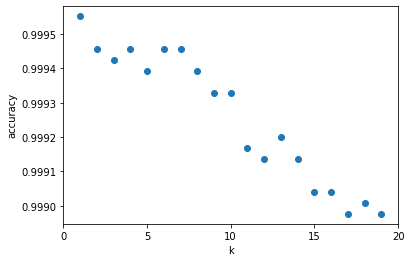

In [78]:
knn_model(X_train, y_train, X_validate, y_validate)

# BootStrap Model

In [79]:
def bootstrap_model(X_train, y_train, X_validate, y_validate):
    rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                min_samples_leaf=3,
                                n_estimators=100,
                                max_depth=3, 
                                random_state=123)
    # Fit the model
    rf.fit(X_train, y_train)
    print(rf.feature_importances_)
    # Make Predictions
    y_pred = rf.predict(X_train)
    # Estimate Probability
    y_pred_proba = rf.predict_proba(X_train)

    # Evaluate Model 
    # Compute the Accuracy
    print('Accuracy of random forest classifier on training set: {:.2f}'
         .format(rf.score(X_train, y_train)))
    # Create a confusion matrix
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))

    # Validate Model
    print('Accuracy of random forest classifier on test set: {:.2f}'
         .format(rf.score(X_validate, y_validate)))
    # out of sample data
    y_val_pred_1 = rf.predict(validate.drop(columns='state_successful'))
    accuracy_v_1 = rf.score(validate.drop(columns='state_successful'), validate.state_successful)
    accuracy = rf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')

In [80]:
bootstrap_model(X_train, y_train, X_validate, y_validate)

[2.01081523e-01 1.58130113e-01 9.42804167e-02 1.15241454e-02
 1.77499471e-03 6.18291086e-04 5.32585278e-01 5.23793327e-06]
Accuracy of random forest classifier on training set: 1.00
[[51735     0]
 [    0 35770]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51735
           1       1.00      1.00      1.00     35770

    accuracy                           1.00     87505
   macro avg       1.00      1.00      1.00     87505
weighted avg       1.00      1.00      1.00     87505

Accuracy of random forest classifier on test set: 1.00

    The accuracy for our model is 1.0
    The True Positive Rate is 1.0, The False Positive Rate is 0.0,
    The True Negative Rate is 1.0, and the False Negative Rate is 0.0
    


# Findings

- Models used with binary target = (logit, KNN, bootstrap models)
- All three models hade an accuracy of 1.00. 
- This is highly unlikly to be true, If i get more time I would like to look into why my accuracy is so high and the features it is testing on. 

# Conclusion

- In conclusion I have deatemrined that there are corrlations between the features backers, usd_pledged_real, usd_goal_real with the target of state_successful.
- I found that there was a negative correlation to the amount usd_goal_real and state_successful. From this I discovered that there was a 'sweet spot' for goals around 5000 dollars.
- I also found that the majority of projects that had 25 or greater backers where more successful.
- The most successful and most popular categories werre film and music.
- I was able to reject each of my null hypothesises solidifying the fact that there is a relationship between these features.
- Lastly the modeling came out not as I would have thought. I did not expect to have an accuracy of 1.00 which my baseline model accuary was equal to 0. (This is because i was using a binary target variable.

# If I Had More Time
- I would have looked into using a continious target varible such as backers or usd_pledged_real. Rather than trying to predict projects who will fail or not id like to look at what factors affect the number of backers and the pledge amounts, knowiung that these two features have a relationship with state_sucessful. With this I would be able to utilize stronger models such as the OLS, Tweedie, or LassoLars and find the best one inorder to reproduce these predictions on future kickstarter projects.
